# LAPTOP PRICE PREDICTION

### Importing Libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Getting our Data

In [83]:
df = pd.read_csv('/Users/pingu/Desktop/Data Science /laptop_pricing.csv')
df

,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4,1000,0,0,15.6,45141
2,HP,3,7,2.30,8,256,256,0,14.0,35999
3,ASUS,3,7,2.30,4,1000,0,0,14.0,39990
4,HP,3,7,2.40,4,1000,0,0,15.6,36263
5,HP,2,4,2.30,4,500,256,0,14.0,26403
6,Lenovo,3,7,2.30,4,1000,0,0,15.6,38290
7,HP,5,8,1.60,8,1000,0,0,14.0,53554
8,Lenovo,1,3,1.80,4,1000,0,0,15.6,29990
9,Dell,3,8,3.90,4,1000,0,0,14.0,38090


### Data Preprocessing

In [84]:
# checking for null values
df.isnull().any().sum()

0

In [85]:
df.columns

Index(['Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)', 'Price'],
      dtype='object')

In [86]:
label_encoder = preprocessing.LabelEncoder()
df['Manufacturer'] = df['Manufacturer'].astype('|S')
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])

In [87]:
# checking vif
variables = df[['Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,4.830255,Manufacturer
1,40.647852,IntelCore(i-)
2,74.128093,IntelCoreGen
3,37.604507,processing speed(GHz)
4,7.636092,Ram(gb)
5,65.612904,HDD(gb)
6,4.828394,SSD(gb)
7,9.230363,Graphics(gb)
8,110.209476,ScreenSize(inch)


In [88]:
# now, we'll drop columns which have vif>10
df = df.drop(['IntelCore(i-)','IntelCoreGen','processing speed(GHz)','HDD(gb)','ScreenSize(inch)'], axis=1)
df

,Manufacturer,Ram(gb),SSD(gb),Graphics(gb),Price
0,1,4,0,0,39057
1,1,4,0,0,45141
2,2,8,256,0,35999
3,0,4,0,0,39990
4,2,4,0,0,36263
5,2,4,256,0,26403
6,3,4,0,0,38290
7,2,8,0,0,53554
8,3,4,0,0,29990
9,1,4,0,0,38090


### Data Visualization

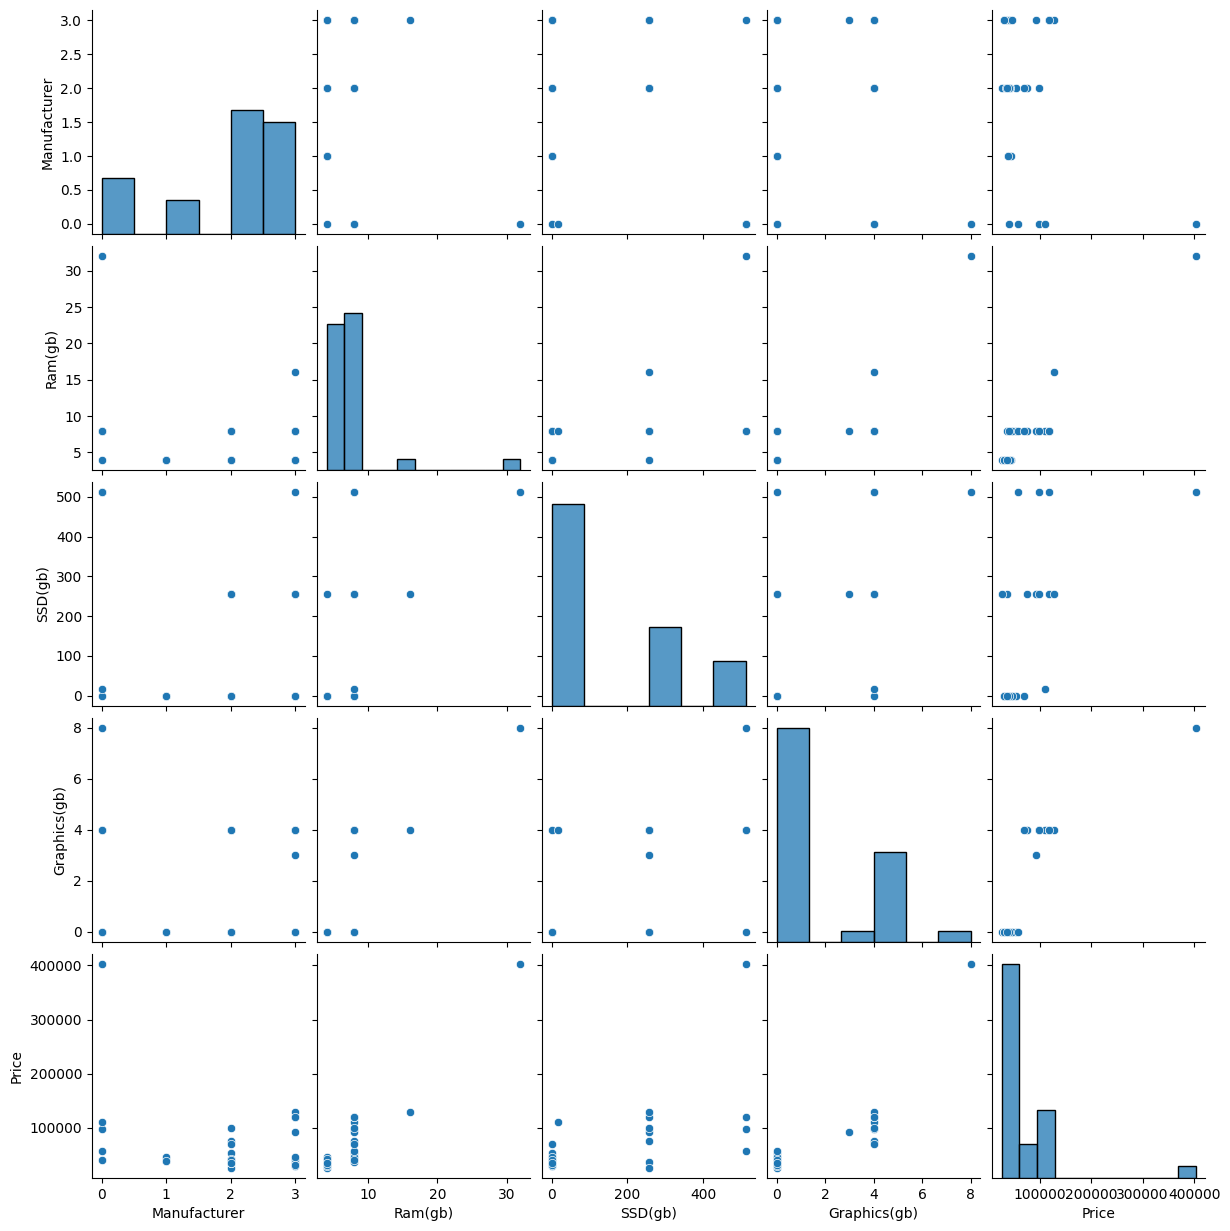

In [89]:
sb.pairplot(df)

<Axes: >

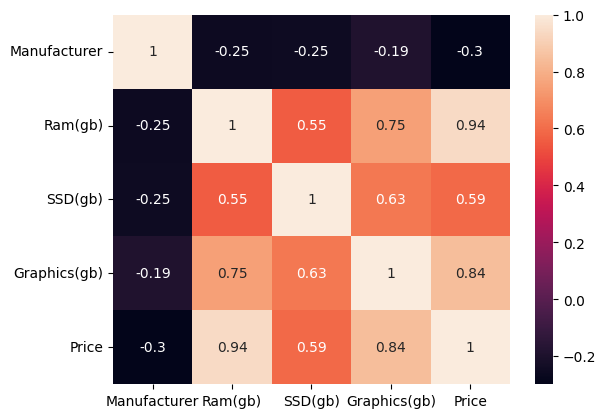

In [90]:
# using Pearson's correlation method
corr = df.corr(method='pearson')
sb.heatmap(corr, annot=True)

### Splitting Data for Training and Testing

In [91]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

### Model

In [92]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)

RandomForestRegressor(random_state=0)

### Making Predictions and Checking Accuracy

In [93]:
y_pred = regr.predict(X_test)

In [94]:
x = r2_score(y_test, y_pred)
x

0.9879177200463668

In [95]:
print(x*100,'% accurate.')

98.79177200463668 % accurate.
